In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

#from google.colab import drive

#drive.mount('/content/gdrive', force_remount=True)
root_path = '/home/ubuntu/cs230'

Using TensorFlow backend.


In [2]:
import os
os.getcwd()
! pip show tensorflow

Name: tensorflow
Version: 2.0.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages
Requires: gast, numpy, tensorflow-estimator, protobuf, absl-py, keras-applications, astor, keras-preprocessing, termcolor, wrapt, google-pasta, six, opt-einsum, wheel, grpcio, tensorboard
Required-by: tensorflow-serving-api, keras-tuner


In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
files = [f"{root_path}/stock_data/{f}" for f in os.listdir(f"{root_path}/stock_data")]
print(files)

['/home/ubuntu/cs230/stock_data/NDAQ.csv', '/home/ubuntu/cs230/stock_data/EXPD.csv', '/home/ubuntu/cs230/stock_data/INCY.csv', '/home/ubuntu/cs230/stock_data/ZION.csv', '/home/ubuntu/cs230/stock_data/NTRS.csv', '/home/ubuntu/cs230/stock_data/ALL.csv', '/home/ubuntu/cs230/stock_data/TXN.csv', '/home/ubuntu/cs230/stock_data/AFL.csv', '/home/ubuntu/cs230/stock_data/ARE.csv', '/home/ubuntu/cs230/stock_data/DVA.csv', '/home/ubuntu/cs230/stock_data/FDX.csv', '/home/ubuntu/cs230/stock_data/MGM.csv', '/home/ubuntu/cs230/stock_data/QCOM.csv', '/home/ubuntu/cs230/stock_data/CHTR.csv', '/home/ubuntu/cs230/stock_data/BAX.csv', '/home/ubuntu/cs230/stock_data/CVX.csv', '/home/ubuntu/cs230/stock_data/ALLE.csv', '/home/ubuntu/cs230/stock_data/APC.csv', '/home/ubuntu/cs230/stock_data/PKI.csv', '/home/ubuntu/cs230/stock_data/APH.csv', '/home/ubuntu/cs230/stock_data/NOV.csv', '/home/ubuntu/cs230/stock_data/HBAN.csv', '/home/ubuntu/cs230/stock_data/SNPS.csv', '/home/ubuntu/cs230/stock_data/URI.csv', '/hom

In [5]:
df = pd.DataFrame() # Initializing Dataset

In [6]:
for file in files:
            print(file)
            #Read in file -- note that parse_dates will be need later
            df0 = pd.read_csv(file)
            df = df.append(df0)
          


/home/ubuntu/cs230/stock_data/NDAQ.csv
/home/ubuntu/cs230/stock_data/EXPD.csv
/home/ubuntu/cs230/stock_data/INCY.csv
/home/ubuntu/cs230/stock_data/ZION.csv


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


/home/ubuntu/cs230/stock_data/NTRS.csv
/home/ubuntu/cs230/stock_data/ALL.csv
/home/ubuntu/cs230/stock_data/TXN.csv
/home/ubuntu/cs230/stock_data/AFL.csv
/home/ubuntu/cs230/stock_data/ARE.csv
/home/ubuntu/cs230/stock_data/DVA.csv
/home/ubuntu/cs230/stock_data/FDX.csv
/home/ubuntu/cs230/stock_data/MGM.csv
/home/ubuntu/cs230/stock_data/QCOM.csv
/home/ubuntu/cs230/stock_data/CHTR.csv
/home/ubuntu/cs230/stock_data/BAX.csv
/home/ubuntu/cs230/stock_data/CVX.csv
/home/ubuntu/cs230/stock_data/ALLE.csv
/home/ubuntu/cs230/stock_data/APC.csv
/home/ubuntu/cs230/stock_data/PKI.csv
/home/ubuntu/cs230/stock_data/APH.csv
/home/ubuntu/cs230/stock_data/NOV.csv
/home/ubuntu/cs230/stock_data/HBAN.csv
/home/ubuntu/cs230/stock_data/SNPS.csv
/home/ubuntu/cs230/stock_data/URI.csv
/home/ubuntu/cs230/stock_data/AEE.csv
/home/ubuntu/cs230/stock_data/PPL.csv
/home/ubuntu/cs230/stock_data/MCO.csv
/home/ubuntu/cs230/stock_data/HSIC.csv
/home/ubuntu/cs230/stock_data/NAVI.csv
/home/ubuntu/cs230/stock_data/MAR.csv
/hom

/home/ubuntu/cs230/stock_data/CPB.csv
/home/ubuntu/cs230/stock_data/APA.csv
/home/ubuntu/cs230/stock_data/AAP.csv
/home/ubuntu/cs230/stock_data/MOS.csv
/home/ubuntu/cs230/stock_data/GE.csv
/home/ubuntu/cs230/stock_data/AMG.csv
/home/ubuntu/cs230/stock_data/HAL.csv
/home/ubuntu/cs230/stock_data/LMT.csv
/home/ubuntu/cs230/stock_data/MS.csv
/home/ubuntu/cs230/stock_data/UNP.csv
/home/ubuntu/cs230/stock_data/CSCO.csv
/home/ubuntu/cs230/stock_data/DUK.csv
/home/ubuntu/cs230/stock_data/KSS.csv
/home/ubuntu/cs230/stock_data/CTAS.csv
/home/ubuntu/cs230/stock_data/RMD.csv
/home/ubuntu/cs230/stock_data/NLSN.csv
/home/ubuntu/cs230/stock_data/FLR.csv
/home/ubuntu/cs230/stock_data/CAH.csv
/home/ubuntu/cs230/stock_data/LB.csv
/home/ubuntu/cs230/stock_data/XLNX.csv
/home/ubuntu/cs230/stock_data/AMAT.csv
/home/ubuntu/cs230/stock_data/TTWO.csv
/home/ubuntu/cs230/stock_data/SBUX.csv
/home/ubuntu/cs230/stock_data/PVH.csv
/home/ubuntu/cs230/stock_data/HRB.csv
/home/ubuntu/cs230/stock_data/BXP.csv
/home/ub

/home/ubuntu/cs230/stock_data/ADM.csv
/home/ubuntu/cs230/stock_data/WDC.csv
/home/ubuntu/cs230/stock_data/TAP.csv
/home/ubuntu/cs230/stock_data/LLL.csv
/home/ubuntu/cs230/stock_data/CERN.csv
/home/ubuntu/cs230/stock_data/ETFC.csv
/home/ubuntu/cs230/stock_data/CMG.csv
/home/ubuntu/cs230/stock_data/MAC.csv
/home/ubuntu/cs230/stock_data/ATVI.csv
/home/ubuntu/cs230/stock_data/MSFT.csv
/home/ubuntu/cs230/stock_data/AYI.csv
/home/ubuntu/cs230/stock_data/ISRG.csv
/home/ubuntu/cs230/stock_data/TGT.csv
/home/ubuntu/cs230/stock_data/EXPE.csv
/home/ubuntu/cs230/stock_data/EL.csv
/home/ubuntu/cs230/stock_data/STT.csv
/home/ubuntu/cs230/stock_data/AWK.csv
/home/ubuntu/cs230/stock_data/MCD.csv
/home/ubuntu/cs230/stock_data/IRM.csv
/home/ubuntu/cs230/stock_data/COP.csv
/home/ubuntu/cs230/stock_data/AVGO.csv
/home/ubuntu/cs230/stock_data/BIIB.csv
/home/ubuntu/cs230/stock_data/HAS.csv
/home/ubuntu/cs230/stock_data/AMD.csv
/home/ubuntu/cs230/stock_data/SWK.csv
/home/ubuntu/cs230/stock_data/HII.csv
/home

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [7]:
len(df)

634525

In [8]:
df=df.dropna() # Just drop samples with Nan 
len(df)

373739

In [9]:
df.head

<bound method NDFrame.head of             accoci        assets     assetsavg       assetsc      assetsnc  \
4    -8.691000e+06  2.925504e+09  3.025636e+09  2.334993e+09  5.905110e+08   
5    -8.691000e+06  2.925504e+09  3.025636e+09  2.334993e+09  5.905110e+08   
6    -8.691000e+06  2.925504e+09  3.025636e+09  2.334993e+09  5.905110e+08   
7    -8.691000e+06  2.925504e+09  3.025636e+09  2.334993e+09  5.905110e+08   
8    -8.691000e+06  2.925504e+09  3.025636e+09  2.334993e+09  5.905110e+08   
9    -8.691000e+06  2.925504e+09  3.025636e+09  2.334993e+09  5.905110e+08   
10   -8.691000e+06  2.925504e+09  3.025636e+09  2.334993e+09  5.905110e+08   
11   -8.691000e+06  2.925504e+09  3.025636e+09  2.334993e+09  5.905110e+08   
12   -8.691000e+06  2.925504e+09  3.025636e+09  2.334993e+09  5.905110e+08   
13   -8.691000e+06  2.925504e+09  3.025636e+09  2.334993e+09  5.905110e+08   
14   -8.691000e+06  2.925504e+09  3.025636e+09  2.334993e+09  5.905110e+08   
15   -8.691000e+06  2.925504e+09  

In [10]:
features_considered = ['open','high','low','close']
# 4 features
#features_considered = ['open','high','low','close','volume','dividends','ev_x','evebit_x','evebitda_x','marketcap_x','pb_x','pe_x','ps_x']
# 13 features lists - to explore -
#features_considered = ['open','high','low','close','volume','dividends','ev_x','evebit_x','evebitda_x','marketcap_x','pb_x','pe_x','ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','deposits','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt','eps','epsdil','epsusd','equity','equityavg','equityusd','ev_y','evebit_y','evebitda_y','fcf','fcfps','fxusd','gp','grossmargin','intangibles','intexp','invcap','invcapavg','inventory','investments','investmentsc','investmentsnc','liabilities','liabilitiesc','liabilitiesnc','marketcap_y','ncf','ncfbus','ncfcommon','ncfdebt','ncfdiv','ncff','ncfi','ncfinv','ncfo','ncfx','netinc','netinccmn','netinccmnusd','netincdis','netincnci','netmargin','opex','opinc','payables','payoutratio','pb_y','pe_y','pe1','ppnenet','prefdivis','price','ps_y','ps1','receivables','retearn','revenue','revenueusd','rnd','roa','roe','roic','ros','sbcomp','sgna','sharefactor','sharesbas','shareswa','shareswadil','sps','tangibles','taxassets','taxexp','taxliabilities','tbvps','workingcapital']
# 41 features lists - to explore -
#features_considered = ['open', 'high', 'low', 'close', 'volume','dividends', 'ev_x', 'evebit_x', 'evebitda_x', 'marketcap_x', 'pb_x', 'pe_x', 'ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt']
# 54 features lists - to explore -
#features_considered = ['open', 'high', 'low', 'close', 'volume','dividends', 'ev_x', 'evebit_x', 'evebitda_x', 'marketcap_x', 'pb_x', 'pe_x', 'ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt','eps','epsdil','epsusd','equity','equityavg','equityusd','ev_y','evebit_y','evebitda_y','fcf','fcfps','gp','grossmargin']
# 77 features lists - to explore -
#features_considered = ['open', 'high', 'low', 'close', 'volume','dividends', 'ev_x', 'evebit_x', 'evebitda_x', 'marketcap_x', 'pb_x', 'pe_x', 'ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt','eps','epsdil','epsusd','equity','equityavg','equityusd','ev_y','evebit_y','evebitda_y','fcf','fcfps','gp','grossmargin','intangibles','invcap','invcapavg','inventory','investmentsnc','liabilities','liabilitiesc','liabilitiesnc','marketcap_y','ncf','ncfbus','ncfcommon','ncfdebt','ncfdiv','ncff','ncfi','ncfinv','ncfo','ncfx','netinc','netinccmn','netinccmnusd','netmargin']
# 98 features lists - to explore -
#features_considered = ['open', 'high', 'low', 'close', 'volume','dividends', 'ev_x', 'evebit_x', 'evebitda_x', 'marketcap_x', 'pb_x', 'pe_x', 'ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt','eps','epsdil','epsusd','equity','equityavg','equityusd','ev_y','evebit_y','evebitda_y','fcf','fcfps','gp','grossmargin','intangibles','invcap','invcapavg','inventory','investmentsnc','liabilities','liabilitiesc','liabilitiesnc','marketcap_y','ncf','ncfbus','ncfcommon','ncfdebt','ncfdiv','ncff','ncfi','ncfinv','ncfo','ncfx','netinc','netinccmn','netinccmnusd','netmargin','opex','opinc','payables','payoutratio','pb_y','pe_y','pe1','ppnenet','price','ps_y','ps1','receivables','retearn','revenue','revenueusd','rnd','roa','roe','roic','ros','sbcomp']
# 109 features lists - to explore -
#features_considered = ['open', 'high', 'low', 'close', 'volume','ev_x', 'evebit_x', 'evebitda_x', 'marketcap_x', 'pb_x', 'pe_x', 'ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt','eps','epsdil','epsusd','equity','equityavg','equityusd','ev_y','evebit_y','evebitda_y','fcf','fcfps','gp','grossmargin','intangibles','invcap','invcapavg','inventory','investmentsnc','liabilities','liabilitiesc','liabilitiesnc','marketcap_y','ncf','ncfbus','ncfcommon','ncfdebt','ncfdiv','ncff','ncfi','ncfinv','ncfo','ncfx','netinc','netinccmn','netinccmnusd','netmargin','opex','opinc','payables','payoutratio','pb_y','pe_y','pe1','ppnenet','price','ps_y','ps1','receivables','retearn','revenue','revenueusd','rnd','roa','roe','roic','ros','sbcomp','sgna','sharesbas','shareswa','shareswadil','sps','tangibles','taxassets','taxexp','taxliabilities','tbvps','workingcapital']
features = df[features_considered]
features.index = df['date']
features.head()

,open,high,low,close
date,,,,
2014-05-08,41.74,44.43,41.530,43.42
2014-05-09,43.26,43.44,42.880,43.32
2014-05-12,43.37,44.13,43.350,43.86
2014-05-13,43.80,44.69,43.691,44.60
2014-05-14,44.50,44.72,44.280,44.66


In [11]:
TRAIN_SPLIT=np.int(len(df)*0.9) # Split 90-5-5
#features[:,4] = np.log(features[:,4])
dataset = features.values # Convert dataset in a numpy array
#dataset[:,4] = np.log(dataset[:,4]) # Log apply to the volumen 
#print(dataset)
#data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_mean = dataset.mean(axis=0)
print(data_mean[3])
#print(data_mean)
#data_std = dataset[:TRAIN_SPLIT].std(axis=0)
data_std = dataset.std(axis=0)
#print(data_std)
dataset = (dataset-data_mean)/data_std
#dataset[:,4] = np.log(dataset[4,:])

107.3362893249032


In [12]:
# Just a sanity check to see Max and Min Normalized values of Closed Prices
for i in range(0,4):
    print(max(dataset[:,i]),min(dataset[:,i]))
    #print(min(dataset[:,i]))

13.866679103092071 -0.6967913920138181
13.85157293854501 -0.6968733820833677
13.766333347811981 -0.6965026424460724
13.835957205636177 -0.6969307773457217


In [13]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])
  #print(labels)
  return np.array(data), np.array(labels)

In [14]:
past_history = 20 #Days taking in the past of each Sample
future_target = 0 # future_target + STEP = days forescat in the future
STEP = 1
np.random.seed(3)

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 3], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 3],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [15]:
# Check to see a Window Sample
print ('Single window of past history : {}'.format(x_train_single[0,:])) # check
print ('Single window of past history : {}'.format(x_train_single[0].shape)) # check
print ('Single sample of Future : {}'.format(y_train_single[0,])) # check
print(dataset[0:21,:]) # dataset Check

Single window of past history : [[-0.43232582 -0.41770102 -0.43074106 -0.4213658 ]
 [-0.42230619 -0.42416758 -0.42175363 -0.42202505]
 [-0.42158108 -0.41966059 -0.41862467 -0.41846512]
 [-0.41874658 -0.41600274 -0.41635451 -0.4135867 ]
 [-0.41413227 -0.41580678 -0.41243333 -0.41319115]
 [-0.4138686  -0.4075113  -0.41223361 -0.40481872]
 [-0.40424448 -0.40222048 -0.40164842 -0.40264321]
 [-0.40332162 -0.40280835 -0.40078296 -0.4031706 ]
 [-0.40411264 -0.40653152 -0.40451108 -0.40706016]
 [-0.40556285 -0.40744598 -0.40637514 -0.4079831 ]
 [-0.40773817 -0.40888299 -0.40517682 -0.40653276]
 [-0.40622204 -0.40783789 -0.40431136 -0.40508242]
 [-0.40424448 -0.40744598 -0.40517682 -0.40659869]
 [-0.40668347 -0.40744598 -0.40544311 -0.40468687]
 [-0.40674939 -0.40907895 -0.4069743  -0.40791718]
 [-0.40833143 -0.40947086 -0.40624199 -0.40758755]
 [-0.40701306 -0.40809917 -0.40444451 -0.40514834]
 [-0.40582653 -0.4085564  -0.40557626 -0.4087742 ]
 [-0.40905654 -0.41012405 -0.40584255 -0.40732386]

In [16]:
BATCH_SIZE = 128
BUFFER_SIZE = 1000 # Previous len(df)

train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [17]:
#print(val_data_single)
#print(x_val_single.shape)
#print(y_val_single.shape)
#print(x_train_single.shape[-2:])
#print(dataset[0:30,:].shape)
for x,y in train_data_single.take(1):
  print("x = ", x.numpy())
  print("y = ", y.numpy())

x =  [[[-0.3936975  -0.39510073 -0.39172896 -0.39466633]
  [-0.39481811 -0.39118161 -0.39279414 -0.38853534]
  [-0.38816033 -0.38954864 -0.38680252 -0.38919458]
  ...
  [-0.38644645 -0.3866093  -0.3856042  -0.38754647]
  [-0.38736931 -0.38935268 -0.38540447 -0.38708499]
  [-0.38789666 -0.3897446  -0.38607021 -0.38813979]]

 [[-0.40813368 -0.40561705 -0.40524339 -0.40435725]
  [-0.40266243 -0.39944443 -0.39998408 -0.39895143]
  [-0.39989385 -0.39888922 -0.40078296 -0.40382985]
  ...
  [-0.3788658  -0.38040401 -0.37561816 -0.37805332]
  [-0.37774519 -0.37942423 -0.375019   -0.37620743]
  [-0.37392191 -0.37524383 -0.37362096 -0.37680075]]

 [[-0.40707898 -0.40979745 -0.4059757  -0.40762052]
  [-0.40754041 -0.40973213 -0.40650829 -0.40785125]
  [-0.40688122 -0.39333713 -0.40451108 -0.39199638]
  ...
  [-0.38618277 -0.3876544  -0.38427272 -0.38649167]
  [-0.38763298 -0.38595611 -0.38513818 -0.38329433]
  [-0.38400746 -0.38621738 -0.38200922 -0.38543688]]

 ...

 [[-0.31986862 -0.32076799 -0

In [18]:
from keras import regularizers

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
TIME_STEPS=past_history
EPOCHS=50
EVALUATION_INTERVAL=1000

single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:],activation='tanh'
                                           ,kernel_initializer='glorot_uniform'
                                           ,activity_regularizer=regularizers.l1(0.01)))
single_step_model.add(tf.keras.layers.Dense(1))

# Optimizers
optimizeAdam=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False, decay=1e-6)
optimizeRMS=tf.keras.optimizers.RMSprop()
optimizeSGD =tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
optimizeSGD1 =tf.keras.optimizers.SGD(lr=0.01, decay=1e-5, momentum=0.9, nesterov=True)

# Compile & Fit
single_step_model.compile(optimizer=optimizeAdam, loss='mae',metrics=["mae"])

single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)



Train for 1000 steps, validate for 50 steps
Epoch 1/50
1000/1000 [==============================] - 19s 19ms/step - loss: 0.0719 - mae: 0.0560 - val_loss: 0.0195 - val_mae: 0.0108
Epoch 2/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0148 - mae: 0.0082 - val_loss: 0.0149 - val_mae: 0.0081
Epoch 3/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0214 - mae: 0.0118 - val_loss: 0.0131 - val_mae: 0.0072
Epoch 4/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0210 - mae: 0.0124 - val_loss: 0.0123 - val_mae: 0.0071
Epoch 5/50
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0156 - mae: 0.0091 - val_loss: 0.0125 - val_mae: 0.0078
Epoch 6/50
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0162 - mae: 0.0098 - val_loss: 0.0107 - val_mae: 0.0063
Epoch 7/50
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0143 - mae: 0.0086 - val_loss: 0.0103 - val_mae: 0.0063
Epoc

In [34]:
for x, y in val_data_single.take(1):
  print(single_step_model.predict(x).shape)
  print(single_step_model.predict(x))
  print("y = ", y.numpy())
  #print("x = ", x.numpy())
  #print("y = ", y.numpy())
  #print(single_step_model.predict(x))

(128, 1)
[[ 2.77]
 [ 2.69]
 [ 2.71]
 [ 2.61]
 [ 2.57]
 [ 2.61]
 [ 2.65]
 [ 2.66]
 [ 2.62]
 [ 2.63]
 [ 2.64]
 [ 2.73]
 [ 2.69]
 [ 2.72]
 [ 2.69]
 [ 2.74]
 [ 2.74]
 [ 2.71]
 [ 2.64]
 [ 2.66]
 [ 2.74]
 [ 2.72]
 [ 2.75]
 [ 2.74]
 [ 2.78]
 [ 2.74]
 [ 2.82]
 [ 2.79]
 [ 2.8 ]
 [ 2.8 ]
 [ 2.82]
 [ 2.84]
 [ 2.85]
 [ 2.86]
 [ 2.89]
 [ 2.95]
 [ 2.96]
 [ 3.01]
 [ 2.99]
 [ 3.05]
 [ 3.04]
 [ 2.97]
 [ 3.02]
 [ 3.04]
 [ 3.01]
 [ 3.  ]
 [ 2.94]
 [ 2.93]
 [ 2.97]
 [-0.24]
 [-0.31]
 [-0.31]
 [-0.3 ]
 [-0.31]
 [-0.3 ]
 [-0.31]
 [-0.31]
 [-0.31]
 [-0.31]
 [-0.31]
 [-0.3 ]
 [-0.3 ]
 [-0.3 ]
 [-0.29]
 [-0.28]
 [-0.29]
 [-0.3 ]
 [-0.31]
 [-0.29]
 [-0.3 ]
 [-0.3 ]
 [-0.29]
 [-0.28]
 [-0.27]
 [-0.27]
 [-0.27]
 [-0.28]
 [-0.28]
 [-0.28]
 [-0.28]
 [-0.28]
 [-0.28]
 [-0.28]
 [-0.29]
 [-0.3 ]
 [-0.29]
 [-0.29]
 [-0.29]
 [-0.29]
 [-0.28]
 [-0.27]
 [-0.27]
 [-0.27]
 [-0.27]
 [-0.26]
 [-0.26]
 [-0.27]
 [-0.26]
 [-0.27]
 [-0.27]
 [-0.27]
 [-0.27]
 [-0.27]
 [-0.28]
 [-0.28]
 [-0.29]
 [-0.29]
 [-0.29]
 [-0.29]
 [-0.27]
 

In [35]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

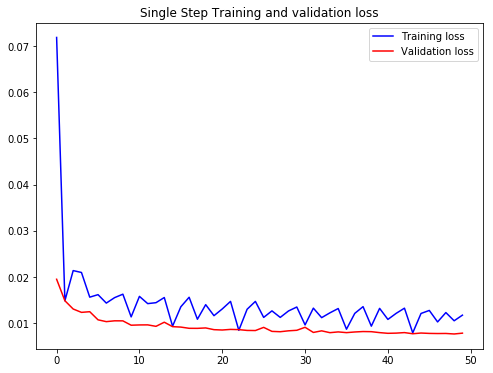

In [36]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

In [37]:
single_step_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4736      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,769
Trainable params: 4,769
Non-trainable params: 0
_________________________________________________________________


In [38]:
#print(x_val_single.shape)
#print(x_val_single)
#print(y.shape)
print(data_std[3])
time=np.arange(len(dataset),dtype="float32")
timev=time[TRAIN_SPLIT:]
print(timev.shape)
print(dataset[-5:,3])
dia=1380
print(dataset[dia,3])
print(dataset[150021,3])
print(single_step_model.predict(dataset[150020:150020+20][np.newaxis]))
print("items in dataset:"+str(len(dataset)))

151.68836383941363
(37374,)
[0.96 0.95 0.94 0.94 0.97]
-0.21970234552852322
0.14176242745858814
[[0.12]]
items in dataset:373739


In [39]:
forecast = []
up_real=0
down_real=0
up_r_up_pred=0
up_r_down_pred=0
d_r_up_pred=0
d_r_down_pred=0
mini_data=352000 # Original dataset len(dataset)
pred_ant=1000

for time in range(mini_data-4000,mini_data - past_history):
  forecast.append(single_step_model.predict(dataset[time:time + past_history][np.newaxis]))
  pred=single_step_model.predict(dataset[time:time + past_history][np.newaxis])
  if dataset[time+past_history,3]>dataset[time+past_history-1,3]:  # Up real
    up_real=up_real+1
    if pred > dataset[time+past_history-1,3]: 
      up_r_up_pred=up_r_up_pred+1 # Up Real Prediction Up 
    else:
      up_r_down_pred=up_r_down_pred+1 # Up real Prediction down
  else: # Down Real
    down_real=down_real+1
    if pred < dataset[time+past_history-1,3]: 
      d_r_down_pred=d_r_down_pred+1 # Down real prediction down
    else:
      d_r_up_pred=d_r_up_pred+1 # Down Real prediction up

#forecast = forecast[TRAIN_SPLIT-past_history:]
#forecast = forecast[len(dataset)-past_history:]

results = np.array(forecast)[:, 0, 0]
#print(results.shape)

val_lapse=len(dataset)-TRAIN_SPLIT
plt.figure(figsize=(10, 6))
#original_price=(dataset[-val_lapse:,3]*data_std[3])+data_mean[3] # To plot only Validation time

original_price=(dataset[:,3]*data_std[3])+data_mean[3]
adjusted_pred =(results*data_std[3])+data_mean[3]

time=np.arange(len(dataset),dtype="float32") # Total study Time
timev=time[past_history:] # Prediction time
#time_valid = time[TRAIN_SPLIT:]
#time_valid = time[split_time:]

#plot_series(time, original_price) 
#plot_series(timev, adjusted_pred)
print("Up_real:"+str(up_real))
print("Down_real:"+str(down_real))
print("Up Real Up Prediction:"+str(up_r_up_pred))
print("Up Real Down Prediction:"+str(up_r_down_pred))
print("Down Real Up Prediction:" + str(d_r_up_pred))
print("Down Real Down Prediction:" + str(d_r_down_pred))


Up_real:2049
Down_real:1931
Up Real Up Prediction:1230
Up Real Down Prediction:819
Down Real Up Prediction:1162
Down Real Down Prediction:769


Normalized Confusion Matrix
[[0.27 0.73]
 [0.26 0.74]]


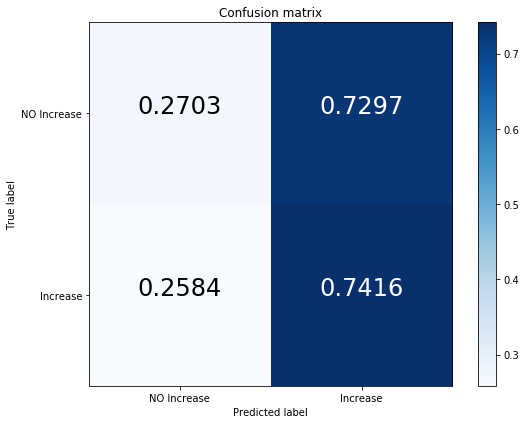

In [30]:
import itertools
import numpy as np
import matplotlib.pyplot as plt


from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



class_names = ['NO Increase', 'Increase']



def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix without normalization")

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    plt.ylim([1.5, -.5])

    fmt = '.4f' if normalize else 'd'

    thresh = cm.max() - 0.05
    #plt.text(j, i, format(cm[i, j], fmt),

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        #print (cm[i, j])
        plt.text(j, i, format(cm[i, j],fmt),
                 horizontalalignment="center",
                 fontsize=24, 
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



# Compute confusion matrix

train_cnf_matrix = np.array([[2034, 2169], [5492, 6225]]).T
eval_cnf_matrix = np.array([[27, 25], [3, 15]]).T
np.set_printoptions(precision=2)


# Set model for saving purposes

model = 'shallow_lstm'



# Plot normalized confusion matrix

plt.figure()

plot_confusion_matrix(train_cnf_matrix, classes=class_names, normalize=True)

plt.tight_layout()
plt.show()

#plt.savefig('gdrive/My Drive/Colab Notebooks/CS230_PROJECT/confusion_matrices/%s_train.png' % model)



#plt.figure()

#plot_confusion_matrix(eval_cnf_matrix, classes=class_names, normalize=True)

#plt.savefig('confusion_matrixes/%s_val.png' % model)

In [41]:
a=20
print(a)

20
